# Pymaceuticals Inc.
--- 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
mouse_data_complete.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# Since we merged unique 'Mouse ID' with study data having timepoints, we need to count number of unique id in the merged data
mouse_data_complete['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# (1) use 'duplicated' method in pandas to find all duplicated rows for columns 'Mouse ID' and 'Timepoint'. Then you need to call unique on the 'Mouse ID' column to get all the ids where this duplication happens
# Code is more universal since if there were multiple duplicate mouse id we would get an array of them
duplicate_ids = mouse_data_complete['Mouse ID'][mouse_data_complete.duplicated(subset=['Mouse ID','Timepoint'], keep=False)].unique()
duplicate_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# (2) use 'isin' method to pull rows only where the Mouse ID is part of the duplicate_ids array
mouse_data_complete.loc[mouse_data_complete['Mouse ID'].isin(duplicate_ids)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# We can negate the 'isin' filtering we just did to get a new dataframe where the data does not include any duplicate_ids
mouse_data_complete= mouse_data_complete.loc[~mouse_data_complete['Mouse ID'].isin(duplicate_ids)]
mouse_data_complete.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data_complete['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# create groupby object based on 'Drug Regimen' for use later 
drug_reg_group = mouse_data_complete.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean_values = drug_reg_group['Tumor Volume (mm3)'].mean()
tumor_median_values = drug_reg_group['Tumor Volume (mm3)'].median()
tumor_var_values = drug_reg_group['Tumor Volume (mm3)'].var()
tumor_std_values = drug_reg_group['Tumor Volume (mm3)'].std()
tumor_sem_values = drug_reg_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

tumor_summary_df = pd.concat([tumor_mean_values,tumor_median_values,tumor_var_values,tumor_std_values,tumor_sem_values], axis=1, keys=['Mean Tumor Volume','Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.'])
tumor_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_df = drug_reg_group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
tumor_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

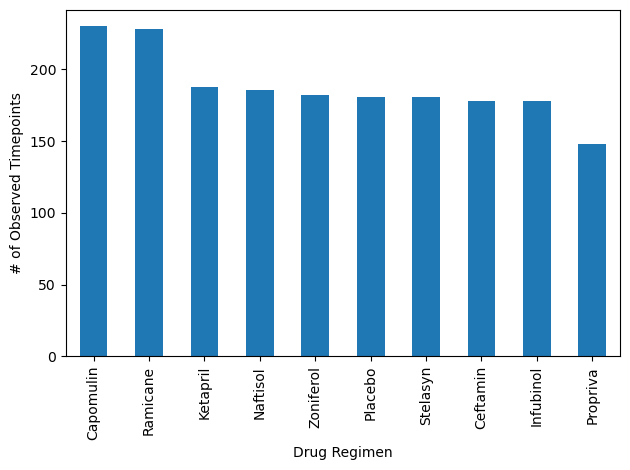

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Call 'size' method and plot this directly by then calling 'plot' in the same line
# Sort largest to smallest value using 'sort_values'
pandas_bar_plot = drug_reg_group.size().sort_values(ascending=False).plot(kind='bar',xlabel='Drug Regimen',ylabel='# of Observed Timepoints')
plt.tight_layout()
plt.show()

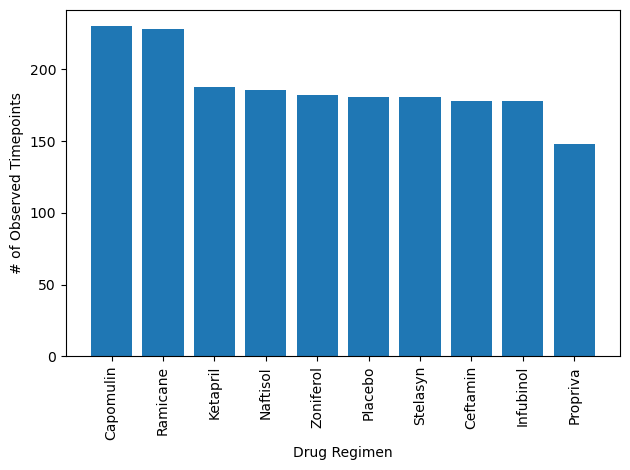

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Pass dataframe index as x values and dataframe values as y values. We are still calling 'size' method in both cases to convert groupby object to dataframe directly in the plt.bar argument
# Sort largest to smallest value using 'sort_values'
pyplot_bar_plot = plt.bar(drug_reg_group.size().sort_values(ascending=False).index,drug_reg_group.size().sort_values(ascending=False).values)

# Format Chart
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

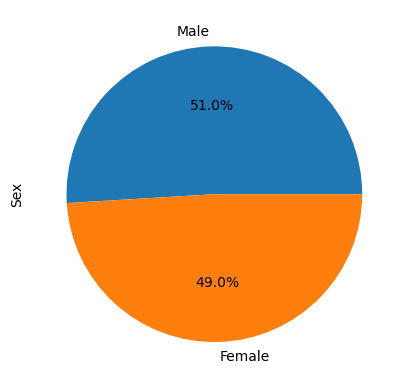

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Regroup the original dataframe by column 'Sex' and get the size
# Sort largest to smallest value using 'sort_values'
pandas_pie_chart = mouse_data_complete.groupby(['Sex']).size().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%',ylabel='Sex')

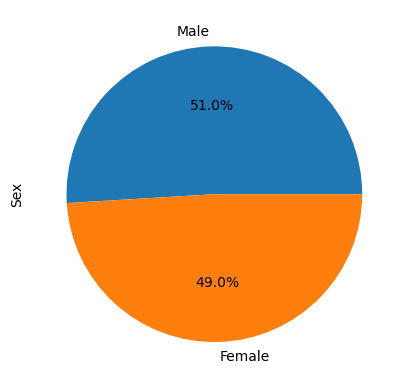

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Regroup the original dataframe by column 'Sex' and get the size
# Sort largest to smallest value using 'sort_values'
pyplot_pie_chart = plt.pie(mouse_data_complete.groupby(['Sex']).size().sort_values(ascending=False).values, labels=mouse_data_complete.groupby(['Sex']).size().sort_values(ascending=False).index,autopct='%1.1f%%' )
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = mouse_data_complete.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(last_timepoints, mouse_data_complete, on=['Mouse ID', 'Timepoint'])
final_tumor_vol_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_df = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == treatment]

    # add subset 
    tumor_vol_data.append(filtered_df['Tumor Volume (mm3)'])  
    
    # (3) Determine outliers using upper and lower bounds
    q1 = filtered_df['Tumor Volume (mm3)'].quantile(0.25)
    q3 = filtered_df['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
   
    # Perform comparison of the bounds to filter the dataframe to only outlier values from 'Tumor Volume (mm3)' column
    # Get the 'Tumor Volume (mm3)' column directly in the same line and those are your outliers
    outliers = filtered_df[(filtered_df['Tumor Volume (mm3)'] < lower_bound) | (filtered_df['Tumor Volume (mm3)'] > upper_bound)]['Tumor Volume (mm3)']
    
    # Pring the potential outliers for each
    print(f"{treatment}'s potential outliers: {outliers}")  


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


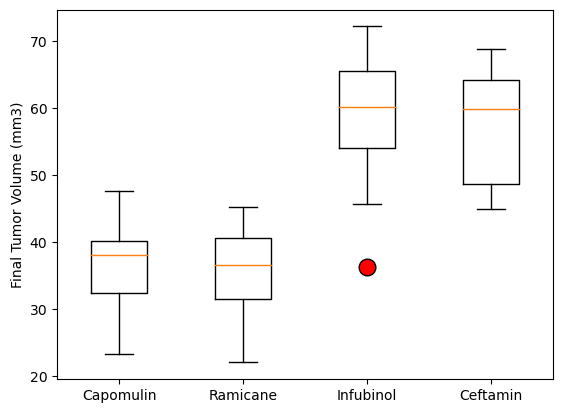

In [15]:
# (4) Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments_box_plot = plt.boxplot(tumor_vol_data, labels=treatments)
plt.setp(treatments_box_plot['fliers'], markerfacecolor='red', markeredgecolor='black',markersize=12)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

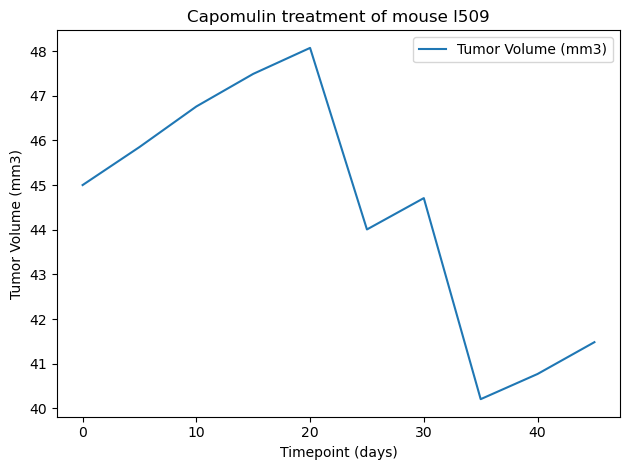

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id_to_plot = 'l509'
filtered_df_single_mouse = mouse_data_complete.loc[(mouse_data_complete['Drug Regimen'] == 'Capomulin') & (mouse_data_complete['Mouse ID'] == mouse_id_to_plot)]
mouse_tumor_line_plot = filtered_df_single_mouse.plot('Timepoint','Tumor Volume (mm3)', title=f'Capomulin treatment of mouse {mouse_id_to_plot}',xlabel='Timepoint (days)' ,ylabel='Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

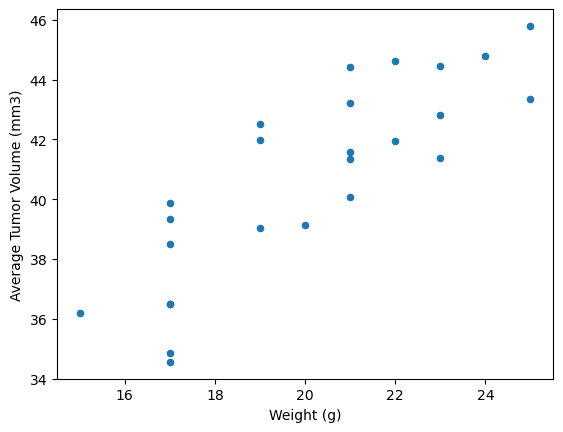

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# first filter df by 'Capomulin'
Capomulin_df = mouse_data_complete.loc[(mouse_data_complete['Drug Regimen'] == 'Capomulin')]

# then groupby 'Mouse ID' and 'Weight (g)', use 'mean' operator, reset index and set the new index to 'Mouse ID'
# Rename column to 'Average Tumor Volume (mm3)'
avg_tumor_vol = Capomulin_df.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index().set_index('Mouse ID')
avg_tumor_vol.rename(columns={"Tumor Volume (mm3)" : "Average Tumor Volume (mm3)"},inplace=True)

# create the scatter plot
avg_tumor_vol_scatter = avg_tumor_vol.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


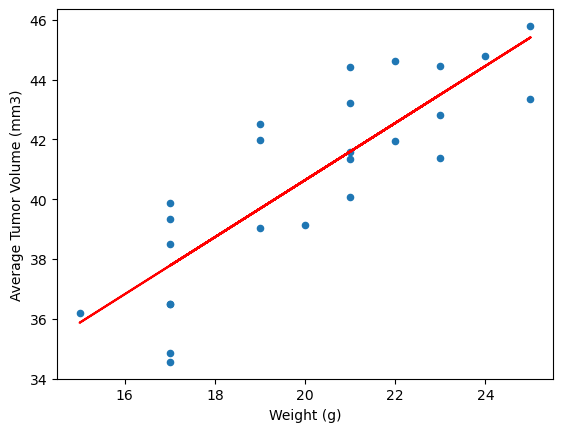

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Average Tumor Volume (mm3)'])

# Correlation coefficient is taken from this 'lineregress' call as the rvalue. We can also get the same value by calling 'corr()' on 'Weight (g)' vs 'Average Tumor Volume (mm3)'
# Print the correlation coefficient (rvalue) to two decimal points
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')

# Get the linear regression values by using 'lineregress' results and formula y = mx + b
regress_values = avg_tumor_vol['Weight (g)'] * slope + intercept

# plot scatter plot and linear regression on same plot
avg_tumor_vol.plot(kind='scatter', x='Weight (g)', y='Average Tumor Volume (mm3)')
plt.plot(avg_tumor_vol['Weight (g)'],regress_values,"r-")
plt.show()